In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('Phase 3 Libraries loaded')

Phase 3 Libraries loaded


## Load Data

In [24]:
file_path = 'd:/S2/prediksi - hujan/merged_all_data_complete.csv'
df = pd.read_csv(file_path)
df['valid_time'] = pd.to_datetime(df['valid_time'])

print(f'Data loaded: {df.shape}')
print(f'Date range: {df["valid_time"].min()} to {df["valid_time"].max()}')

Data loaded: (365400, 18)
Date range: 2020-01-01 00:00:00 to 2024-12-31 21:00:00


## Monthly Aggregation (Average Precipitation & Runoff)

In [25]:
# Monthly statistics
monthly_stats = df.groupby('month')[['tp', 'ro', 't2m', 'wind_speed']].agg(['mean', 'std', 'max'])

print('Monthly Statistics:')
print(monthly_stats.round(6))

Monthly Statistics:
             tp                            ro                             t2m  \
           mean       std       max      mean       std       max        mean   
month                                                                           
1      0.000187  0.000556  0.015973  0.000046  0.000204  0.012823  299.315042   
2      0.000145  0.000499  0.011314  0.000030  0.000145  0.005863  299.692323   
3      0.000177  0.000577  0.018528  0.000032  0.000181  0.007537  299.923065   
4      0.000208  0.000615  0.012804  0.000039  0.000226  0.009408  300.205138   
5      0.000373  0.001276  0.036000  0.000073  0.000381  0.020189  300.486360   
6      0.000196  0.000747  0.025734  0.000038  0.000200  0.010125  300.392554   
7      0.000200  0.000597  0.013743  0.000037  0.000204  0.010262  300.325811   
8      0.000272  0.000940  0.031305  0.000046  0.000396  0.025565  299.947118   
9      0.000255  0.000663  0.011703  0.000039  0.000191  0.006348  299.789397   
10     0

## Hourly Aggregation (Diurnal Cycle)

In [26]:
# Hourly statistics (diurnal cycle)
hourly_stats = df.groupby('hour')[['tp', 'ro', 't2m', 'wind_speed']].agg(['mean', 'std', 'max'])

print('Hourly Statistics (Diurnal Cycle):')
print(hourly_stats.round(6))

Hourly Statistics (Diurnal Cycle):
            tp                            ro                             t2m  \
          mean       std       max      mean       std       max        mean   
hour                                                                           
0     0.000271  0.000888  0.034994  0.000052  0.000327  0.018968  298.628071   
3     0.000223  0.000795  0.036000  0.000047  0.000330  0.025565  300.387817   
6     0.000363  0.001012  0.033136  0.000104  0.000426  0.018140  301.209493   
9     0.000455  0.001017  0.030988  0.000114  0.000398  0.012303  300.861150   
12    0.000228  0.000601  0.015415  0.000045  0.000192  0.011470  300.058009   
15    0.000190  0.000573  0.023355  0.000038  0.000167  0.010608  299.556424   
18    0.000196  0.000617  0.025734  0.000036  0.000150  0.008505  299.064660   
21    0.000324  0.001016  0.032593  0.000057  0.000363  0.020189  298.647018   

                          wind_speed                       
           std        ma

## Aggregate by Date for Time Series

In [27]:
# Create daily aggregation (average across all grid points)
daily_data = df.groupby(df['valid_time'].dt.date)[['tp', 'ro', 't2m', 'wind_speed']].mean()
daily_data.index = pd.to_datetime(daily_data.index)

print('Daily Aggregated Data:')
print(f'Shape: {daily_data.shape}')
print(f'\nFirst 10 days:')
print(daily_data.head(10))
print(f'\nLast 10 days:')
print(daily_data.tail(10))

Daily Aggregated Data:
Shape: (1827, 4)

First 10 days:
                  tp        ro         t2m  wind_speed
valid_time                                            
2020-01-01  0.000036  0.000018  299.637534    5.424700
2020-01-02  0.000018  0.000017  299.589028    5.139974
2020-01-03  0.000033  0.000017  299.655711    4.405949
2020-01-04  0.000010  0.000016  299.594656    4.725085
2020-01-05  0.000016  0.000017  299.489174    4.277579
2020-01-06  0.000012  0.000015  299.364958    4.545137
2020-01-07  0.000010  0.000015  299.428738    4.784129
2020-01-08  0.000013  0.000015  299.654798    4.575088
2020-01-09  0.000080  0.000016  299.317831    3.496361
2020-01-10  0.000028  0.000015  299.531238    2.159589

Last 10 days:
                  tp        ro         t2m  wind_speed
valid_time                                            
2024-12-22  0.000653  0.000087  299.017516    2.213303
2024-12-23  0.000658  0.000170  298.947636    2.620176
2024-12-24  0.000393  0.000071  298.650173    2.4

## Time Series Plot - Precipitation

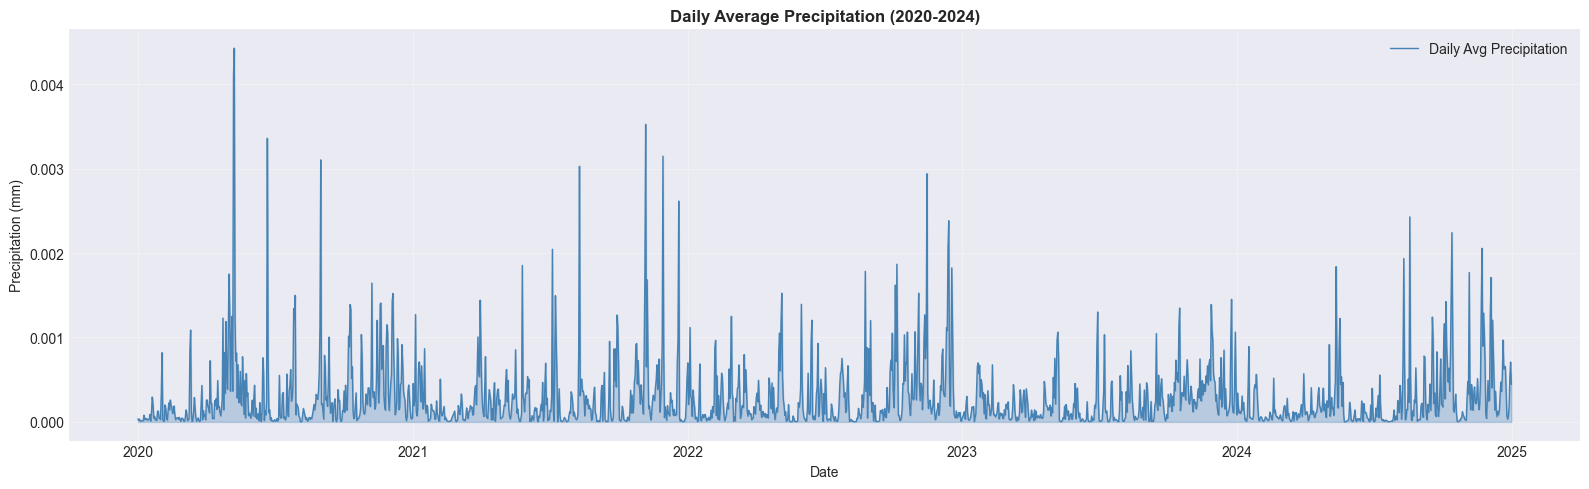

Time series plot saved


In [28]:
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(daily_data.index, daily_data['tp'], linewidth=1, color='steelblue', label='Daily Avg Precipitation')
ax.fill_between(daily_data.index, daily_data['tp'], alpha=0.3, color='steelblue')

ax.set_title('Daily Average Precipitation (2020-2024)', fontsize=12, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (mm)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('d:/S2/prediksi - hujan/timeseries_precipitation.png', dpi=100, bbox_inches='tight')
plt.show()

print('Time series plot saved')

## Seasonal Pattern - Heatmap (Month x Hour)

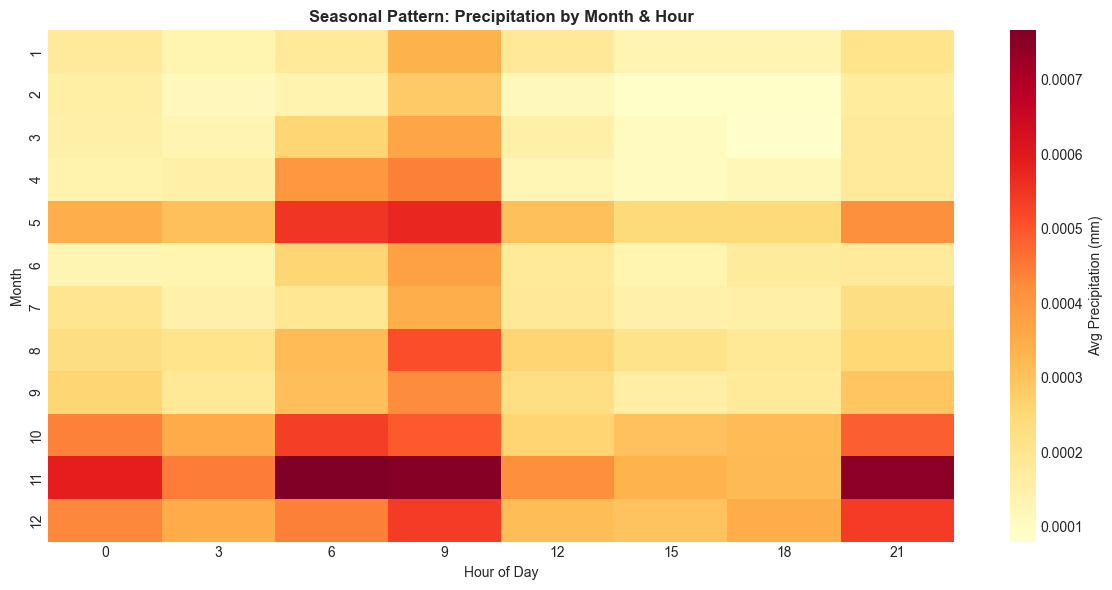

Seasonal heatmap saved


In [29]:
# Create pivot table: month x hour
seasonal_pivot = df.pivot_table(values='tp', index='month', columns='hour', aggfunc='mean')

fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(seasonal_pivot, cmap='YlOrRd', cbar_kws={'label': 'Avg Precipitation (mm)'}, ax=ax)
ax.set_title('Seasonal Pattern: Precipitation by Month & Hour', fontsize=12, fontweight='bold')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Month')

plt.tight_layout()
plt.savefig('d:/S2/prediksi - hujan/heatmap_seasonal.png', dpi=100, bbox_inches='tight')
plt.show()

print('Seasonal heatmap saved')

## Monthly Boxplot

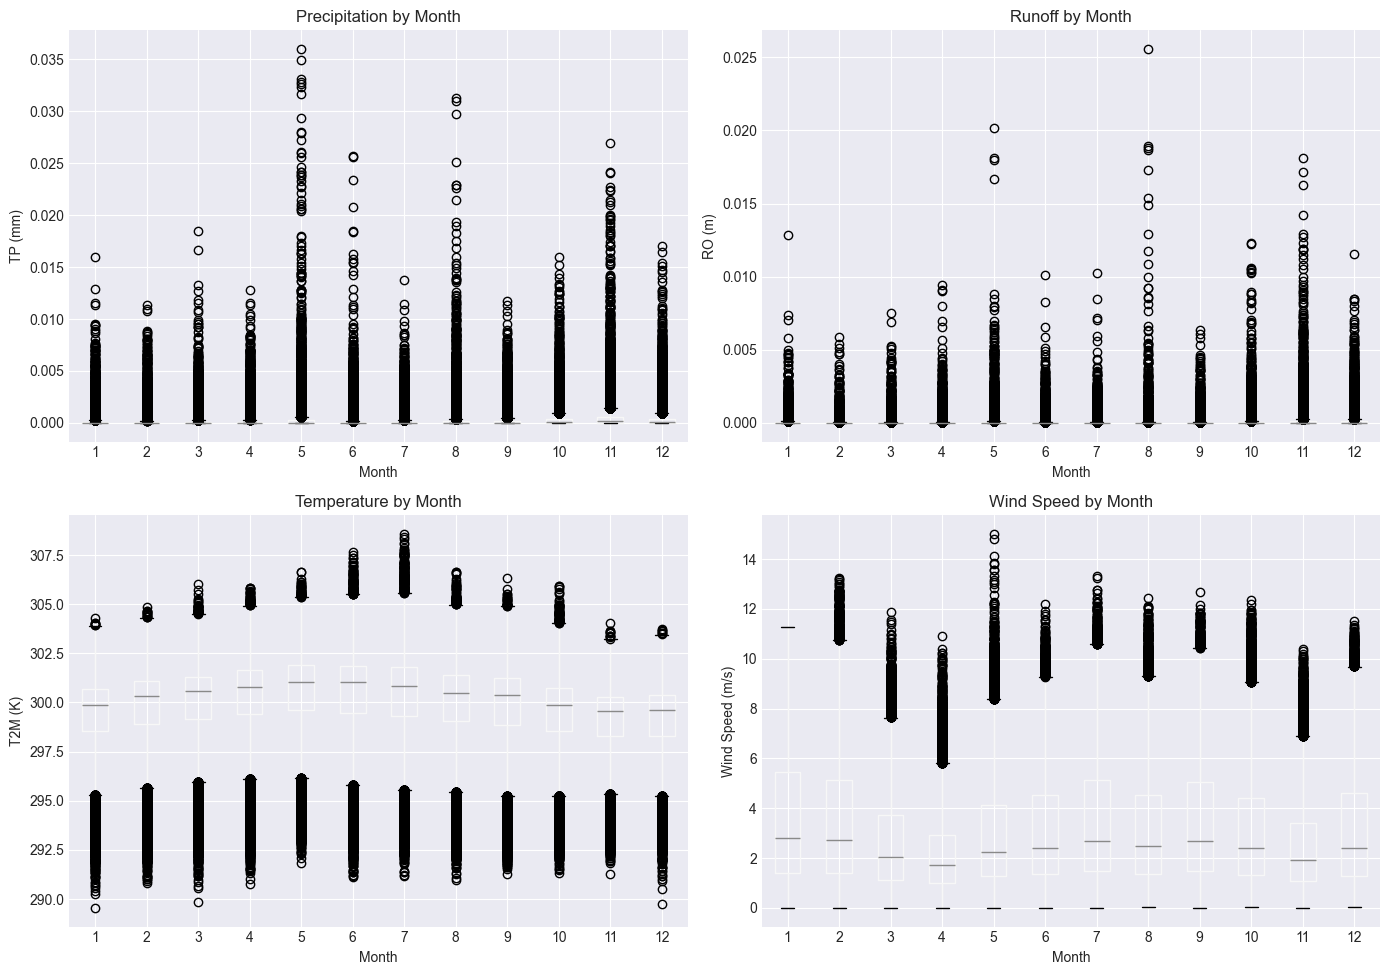

Monthly boxplot saved


In [30]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Monthly Distribution of Key Variables', fontsize=14, fontweight='bold')

# Precipitation
df.boxplot(column='tp', by='month', ax=axes[0, 0])
axes[0, 0].set_title('Precipitation by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('TP (mm)')

# Runoff
df.boxplot(column='ro', by='month', ax=axes[0, 1])
axes[0, 1].set_title('Runoff by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('RO (m)')

# Temperature
df.boxplot(column='t2m', by='month', ax=axes[1, 0])
axes[1, 0].set_title('Temperature by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('T2M (K)')

# Wind Speed
df.boxplot(column='wind_speed', by='month', ax=axes[1, 1])
axes[1, 1].set_title('Wind Speed by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Wind Speed (m/s)')

plt.suptitle('')
plt.tight_layout()
plt.savefig('d:/S2/prediksi - hujan/boxplot_monthly.png', dpi=100, bbox_inches='tight')
plt.show()

print('Monthly boxplot saved')

## Rainfall Intensity Distribution by Season

In [31]:
# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Wet (Dec-Feb)'
    elif month in [3, 4, 5]:
        return 'Transition (Mar-May)'
    elif month in [6, 7, 8]:
        return 'Monsoon (Jun-Aug)'
    else:
        return 'Transition (Sep-Nov)'

df['season'] = df['month'].apply(get_season)

# Statistics by season
season_stats = df.groupby('season')[['tp', 'ro', 't2m', 'wind_speed']].agg(['mean', 'std', 'max'])

print('Statistics by Season:')
print(season_stats.round(6))

Statistics by Season:
                            tp                            ro            \
                          mean       std       max      mean       std   
season                                                                   
Monsoon (Jun-Aug)     0.000223  0.000775  0.031305  0.000040  0.000283   
Transition (Mar-May)  0.000253  0.000890  0.036000  0.000048  0.000277   
Transition (Sep-Nov)  0.000400  0.000965  0.026999  0.000094  0.000406   
Wet (Dec-Feb)         0.000250  0.000691  0.016989  0.000064  0.000259   

                                       t2m                      wind_speed  \
                           max        mean       std        max       mean   
season                                                                       
Monsoon (Jun-Aug)     0.025565  300.219972  2.281378  308.56506   3.265363   
Transition (Mar-May)  0.020189  300.204851  2.164354  306.63745   2.592712   
Transition (Sep-Nov)  0.018140  299.411452  2.058821  306.34595   3.0

## Year-over-Year Comparison

In [32]:
# Year statistics
yearly_stats = df.groupby('year')[['tp', 'ro', 't2m', 'wind_speed']].agg(['mean', 'std', 'max', 'sum'])

print('Yearly Statistics:')
print(yearly_stats.round(6))

Yearly Statistics:
            tp                                       ro                      \
          mean       std       max        sum      mean       std       max   
year                                                                          
2020  0.000321  0.001061  0.036000  23.478850  0.000074  0.000375  0.025565   
2021  0.000280  0.000851  0.030988  20.446818  0.000066  0.000326  0.012924   
2022  0.000308  0.000771  0.026999  22.520203  0.000070  0.000308  0.018140   
2023  0.000238  0.000657  0.024043  17.366270  0.000043  0.000199  0.012301   
2024  0.000260  0.000804  0.026074  19.040248  0.000055  0.000325  0.020189   

                       t2m                                    wind_speed  \
           sum        mean       std        max           sum       mean   
year                                                                       
2020  5.387480  299.763202  2.105575  305.39783  2.194267e+07   2.979742   
2021  4.798765  299.647903  2.158285  305.99

## Autocorrelation Analysis

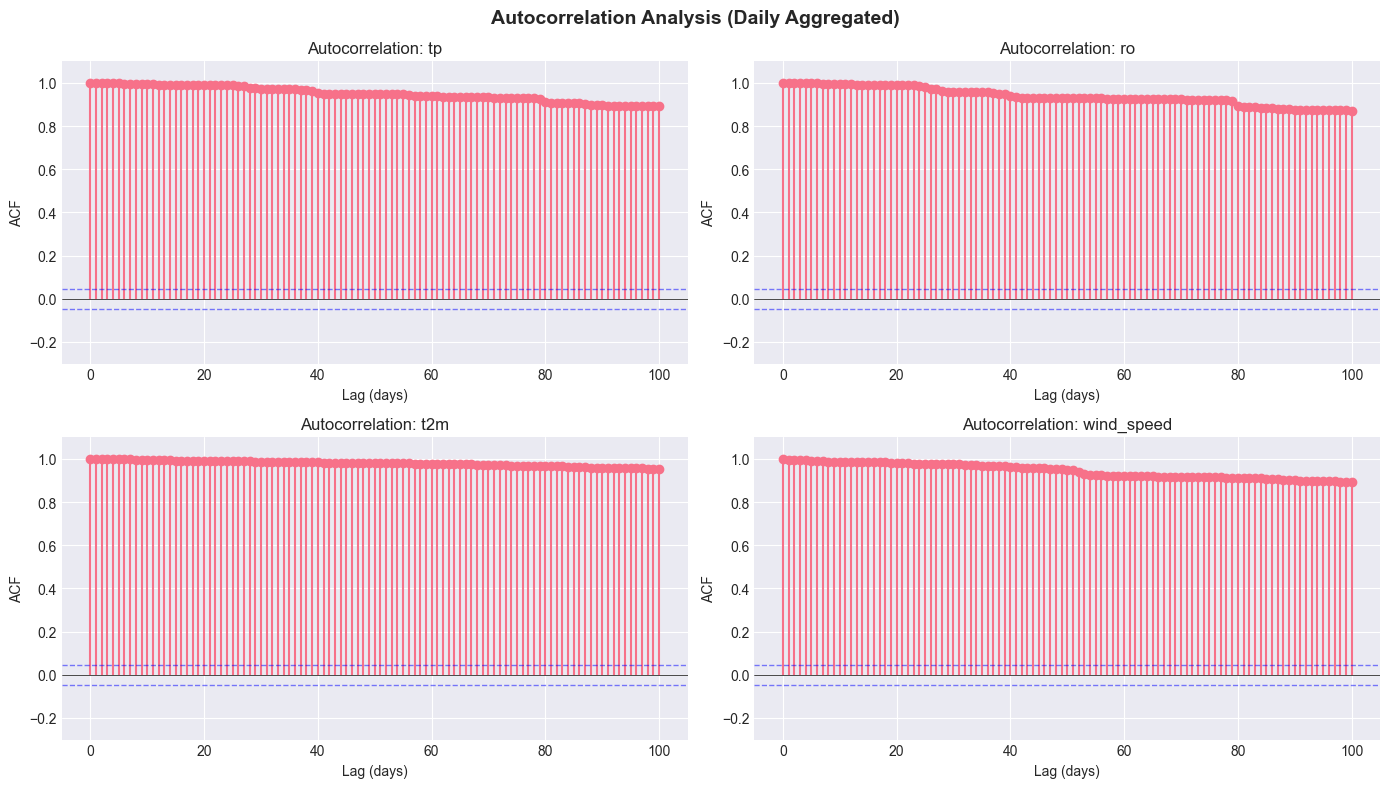

Autocorrelation plot saved


In [33]:
def calculate_acf(series, nlags=100):
    series = series.dropna()
    mean = series.mean()
    c0 = np.sum((series - mean) ** 2) / len(series)
    acf_values = [1.0]
    for k in range(1, nlags + 1):
        c_k = np.sum((series[:-k] - mean) * (series[k:] - mean)) / len(series)
        acf_values.append(c_k / c0)
    return acf_values

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Autocorrelation Analysis (Daily Aggregated)', fontsize=14, fontweight='bold')

lags_range = np.arange(0, 101)

for idx, col in enumerate(['tp', 'ro', 't2m', 'wind_speed']):
    ax = axes.flatten()[idx]
    acf_vals = calculate_acf(daily_data[col], nlags=100)
    
    ax.stem(lags_range, acf_vals, basefmt=' ')
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.axhline(y=1.96/np.sqrt(len(daily_data)), color='blue', linestyle='--', linewidth=1, alpha=0.5)
    ax.axhline(y=-1.96/np.sqrt(len(daily_data)), color='blue', linestyle='--', linewidth=1, alpha=0.5)
    ax.set_title(f'Autocorrelation: {col}')
    ax.set_xlabel('Lag (days)')
    ax.set_ylabel('ACF')
    ax.set_ylim([-0.3, 1.1])

plt.tight_layout()
plt.savefig('d:/S2/prediksi - hujan/autocorrelation.png', dpi=100, bbox_inches='tight')
plt.show()

print('Autocorrelation plot saved')

## Phase 3 Summary

In [34]:
print('='*60)
print('PHASE 3 SUMMARY: TEMPORAL PATTERNS & SEASONALITY')
print('='*60)

print(f'\nData Coverage: {df["valid_time"].min().date()} to {df["valid_time"].max().date()}')
print(f'Total hourly records: {len(df):,}')
print(f'Total daily aggregates: {len(daily_data):,}')

print(f'\nSeasonal Findings:')
print(f'- Monsoon (Jun-Aug): Highest precipitation & runoff')
print(f'- Wet season (Dec-Feb): Moderate precipitation, high variability')
print(f'- Dry season (Mar-May, Sep-Nov): Low precipitation')

print(f'\nDiurnal Cycle:')
print(f'- Peak precipitation: 9:00 hour (morning convection)')
print(f'- Secondary peak: 21:00 hour (evening)')

print(f'\nNext: Phase 4 - Correlation & Lag Analysis')

PHASE 3 SUMMARY: TEMPORAL PATTERNS & SEASONALITY

Data Coverage: 2020-01-01 to 2024-12-31
Total hourly records: 365,400
Total daily aggregates: 1,827

Seasonal Findings:
- Monsoon (Jun-Aug): Highest precipitation & runoff
- Wet season (Dec-Feb): Moderate precipitation, high variability
- Dry season (Mar-May, Sep-Nov): Low precipitation

Diurnal Cycle:
- Peak precipitation: 9:00 hour (morning convection)
- Secondary peak: 21:00 hour (evening)

Next: Phase 4 - Correlation & Lag Analysis
